# London Tube
Simon Schmetz - Paola Carolina Suarez  
Network Analysis  
Master in Statistics for Data Science  
Universidad Carlos III de Madrid  

Data Source: https://github.com/jaron/railgraph

#### Introduction  

The "London Underground Network" refers to the metro system of London, UK, encompassing its stations and the connections between them. The network consists of 309 vertices (representing stations), and 370 edges (representing the metro line connections between stations). Notably, multiple metro lines can connect to the same station, resulting in multiple edges. As an undirected network, each edge signifies a bidirectional connection, meaning travel is possible in both directions between stations.



In [12]:
# Load Libraries 
import pandas as pd
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
#Read the Network
G = nx.read_graphml('data/london_tube/tubeDLR.graphml')

In [24]:
#Count nodes
G.number_of_nodes()


309

In [25]:
#Count edges
len(G.edges(data=True))


370

In [26]:
# Check if the graph is directed
if isinstance(G, nx.DiGraph):
    print("The graph is directed.")
else:
    print("The graph is undirected.")

The graph is undirected.


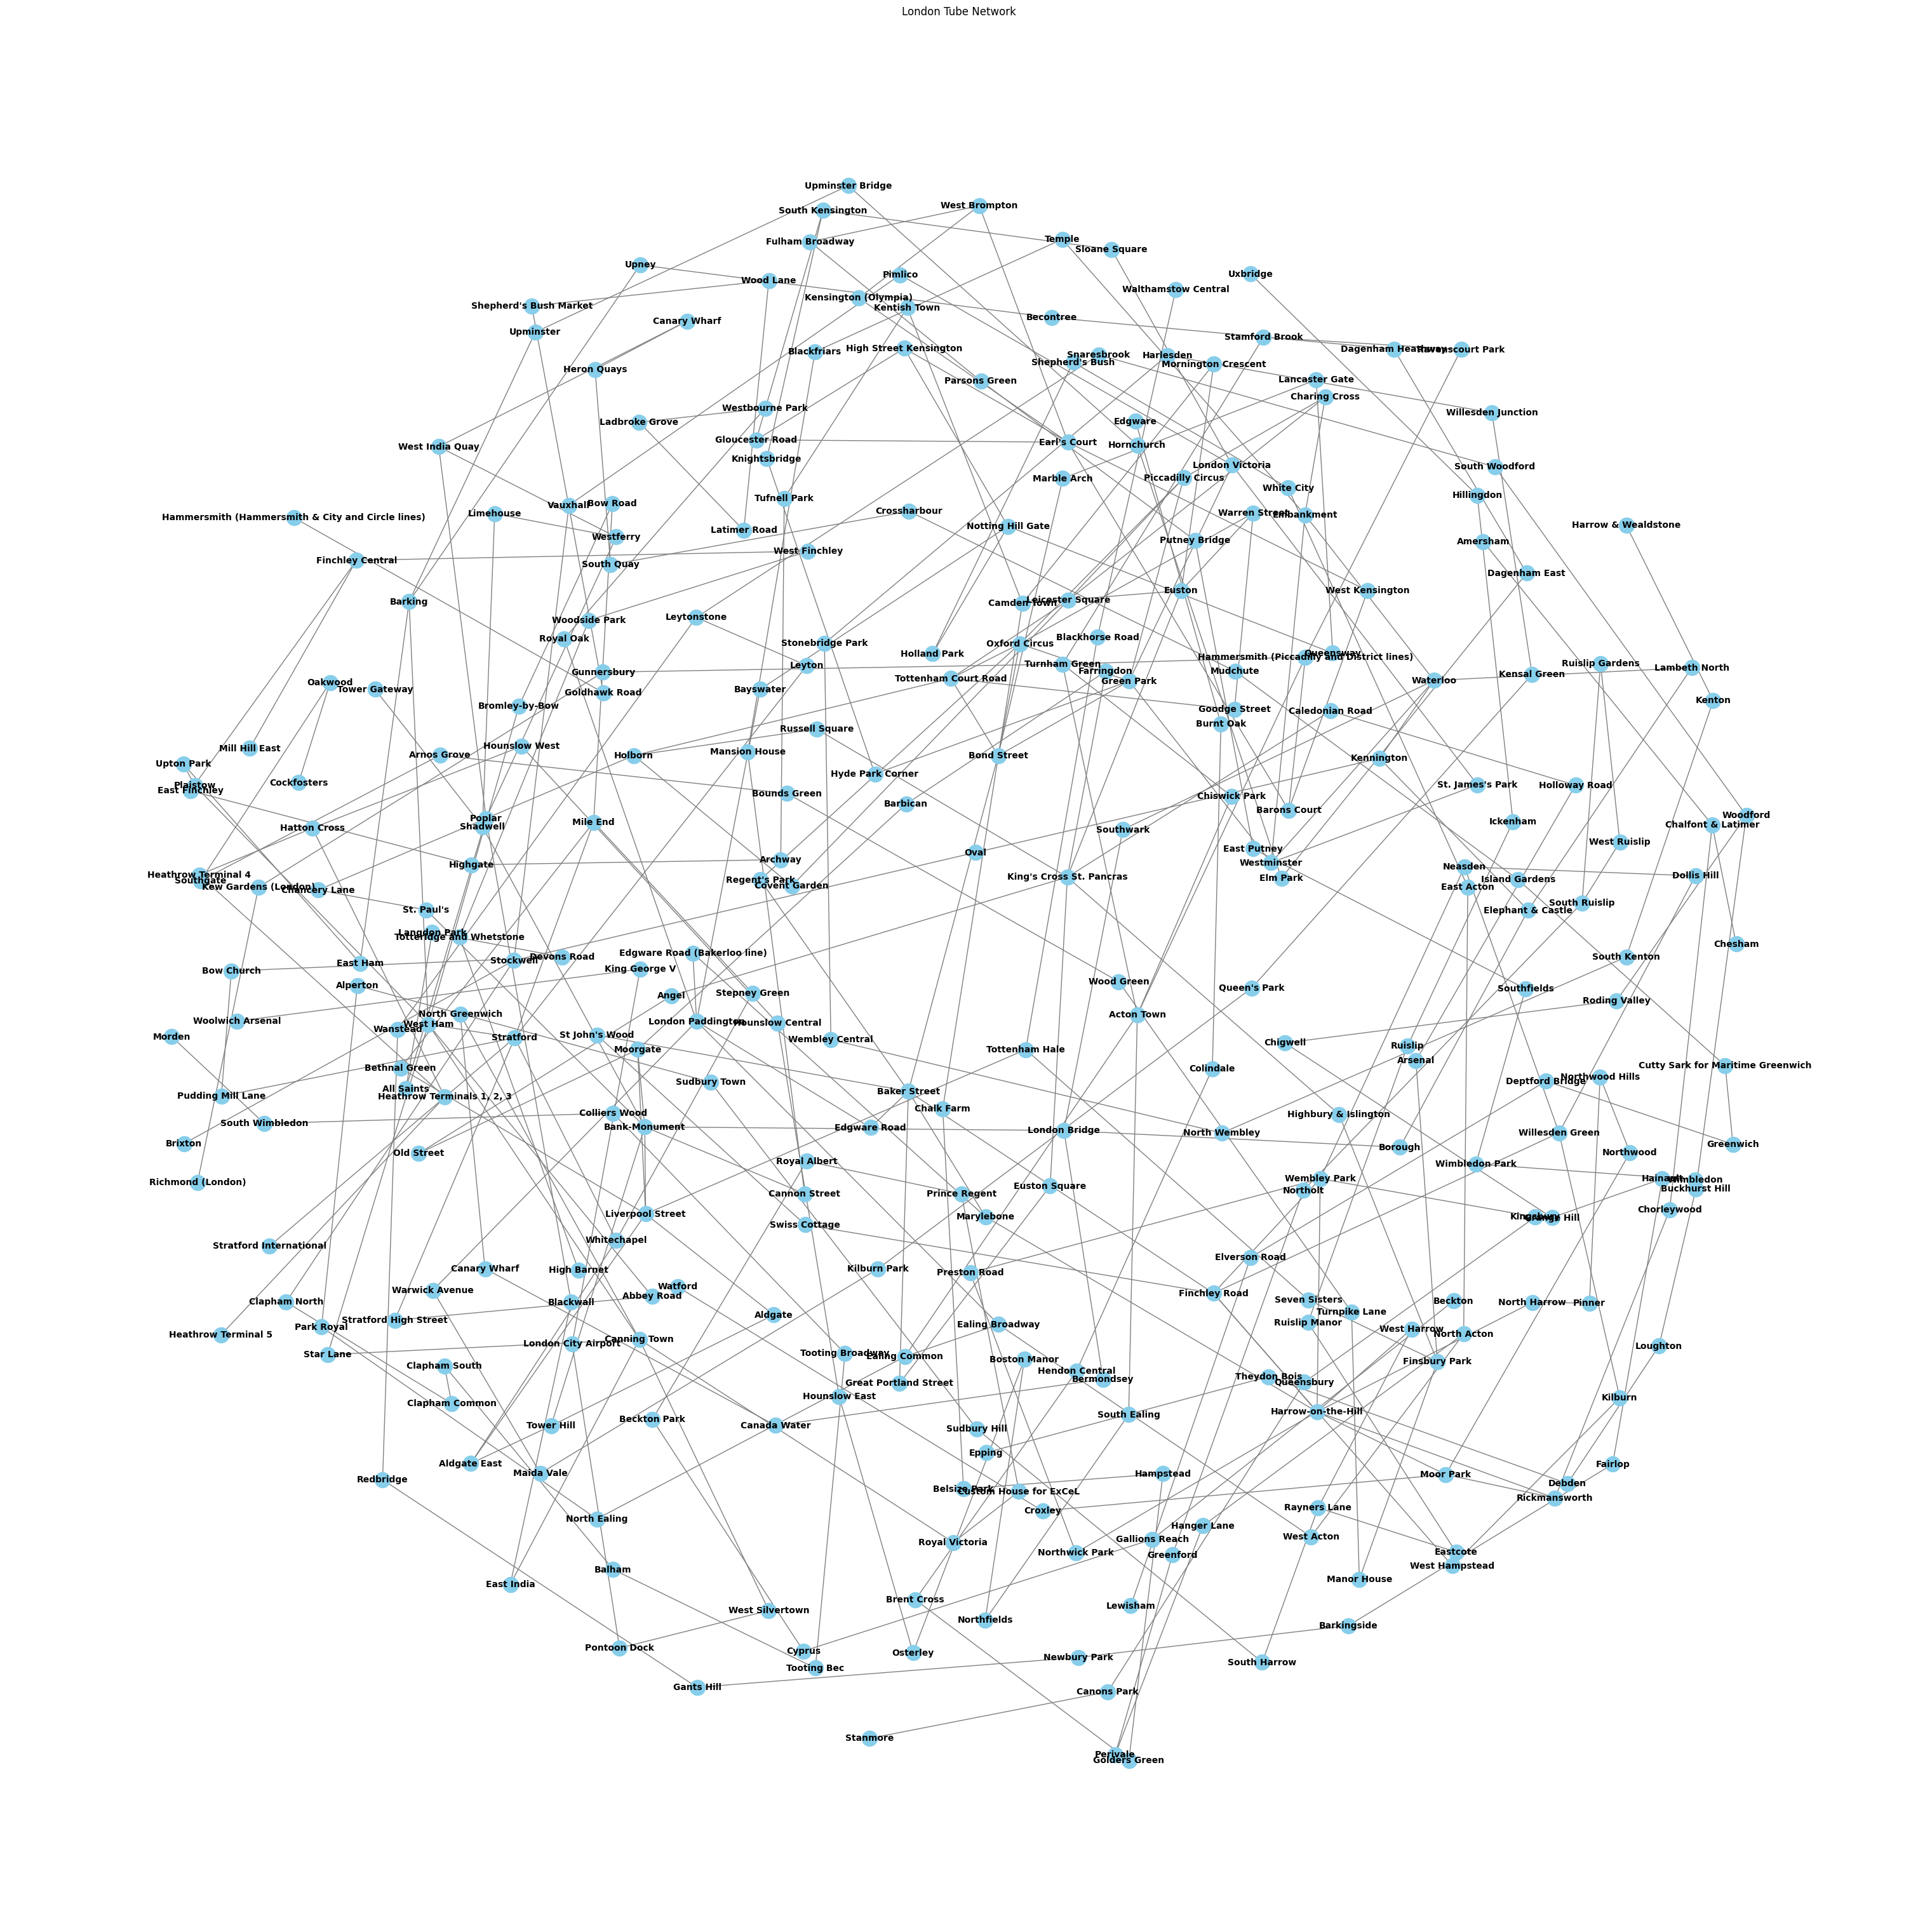

In [ ]:
#London Underground network
# Extract labels from node data (assuming the label column exists)
labels = nx.get_node_attributes(G, 'label')

# Create the plot
plt.figure(figsize=(30, 30))

# Use spring_layout with larger spacing between nodes
pos = nx.spring_layout(G, seed=42, k=0.3)  # Adjust k for node spacing (default k=0.1)

# Draw the network with the station names as labels
nx.draw(G, pos, with_labels=True, labels=labels, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

# Display the plot
plt.title("London Tube Network")
plt.show()


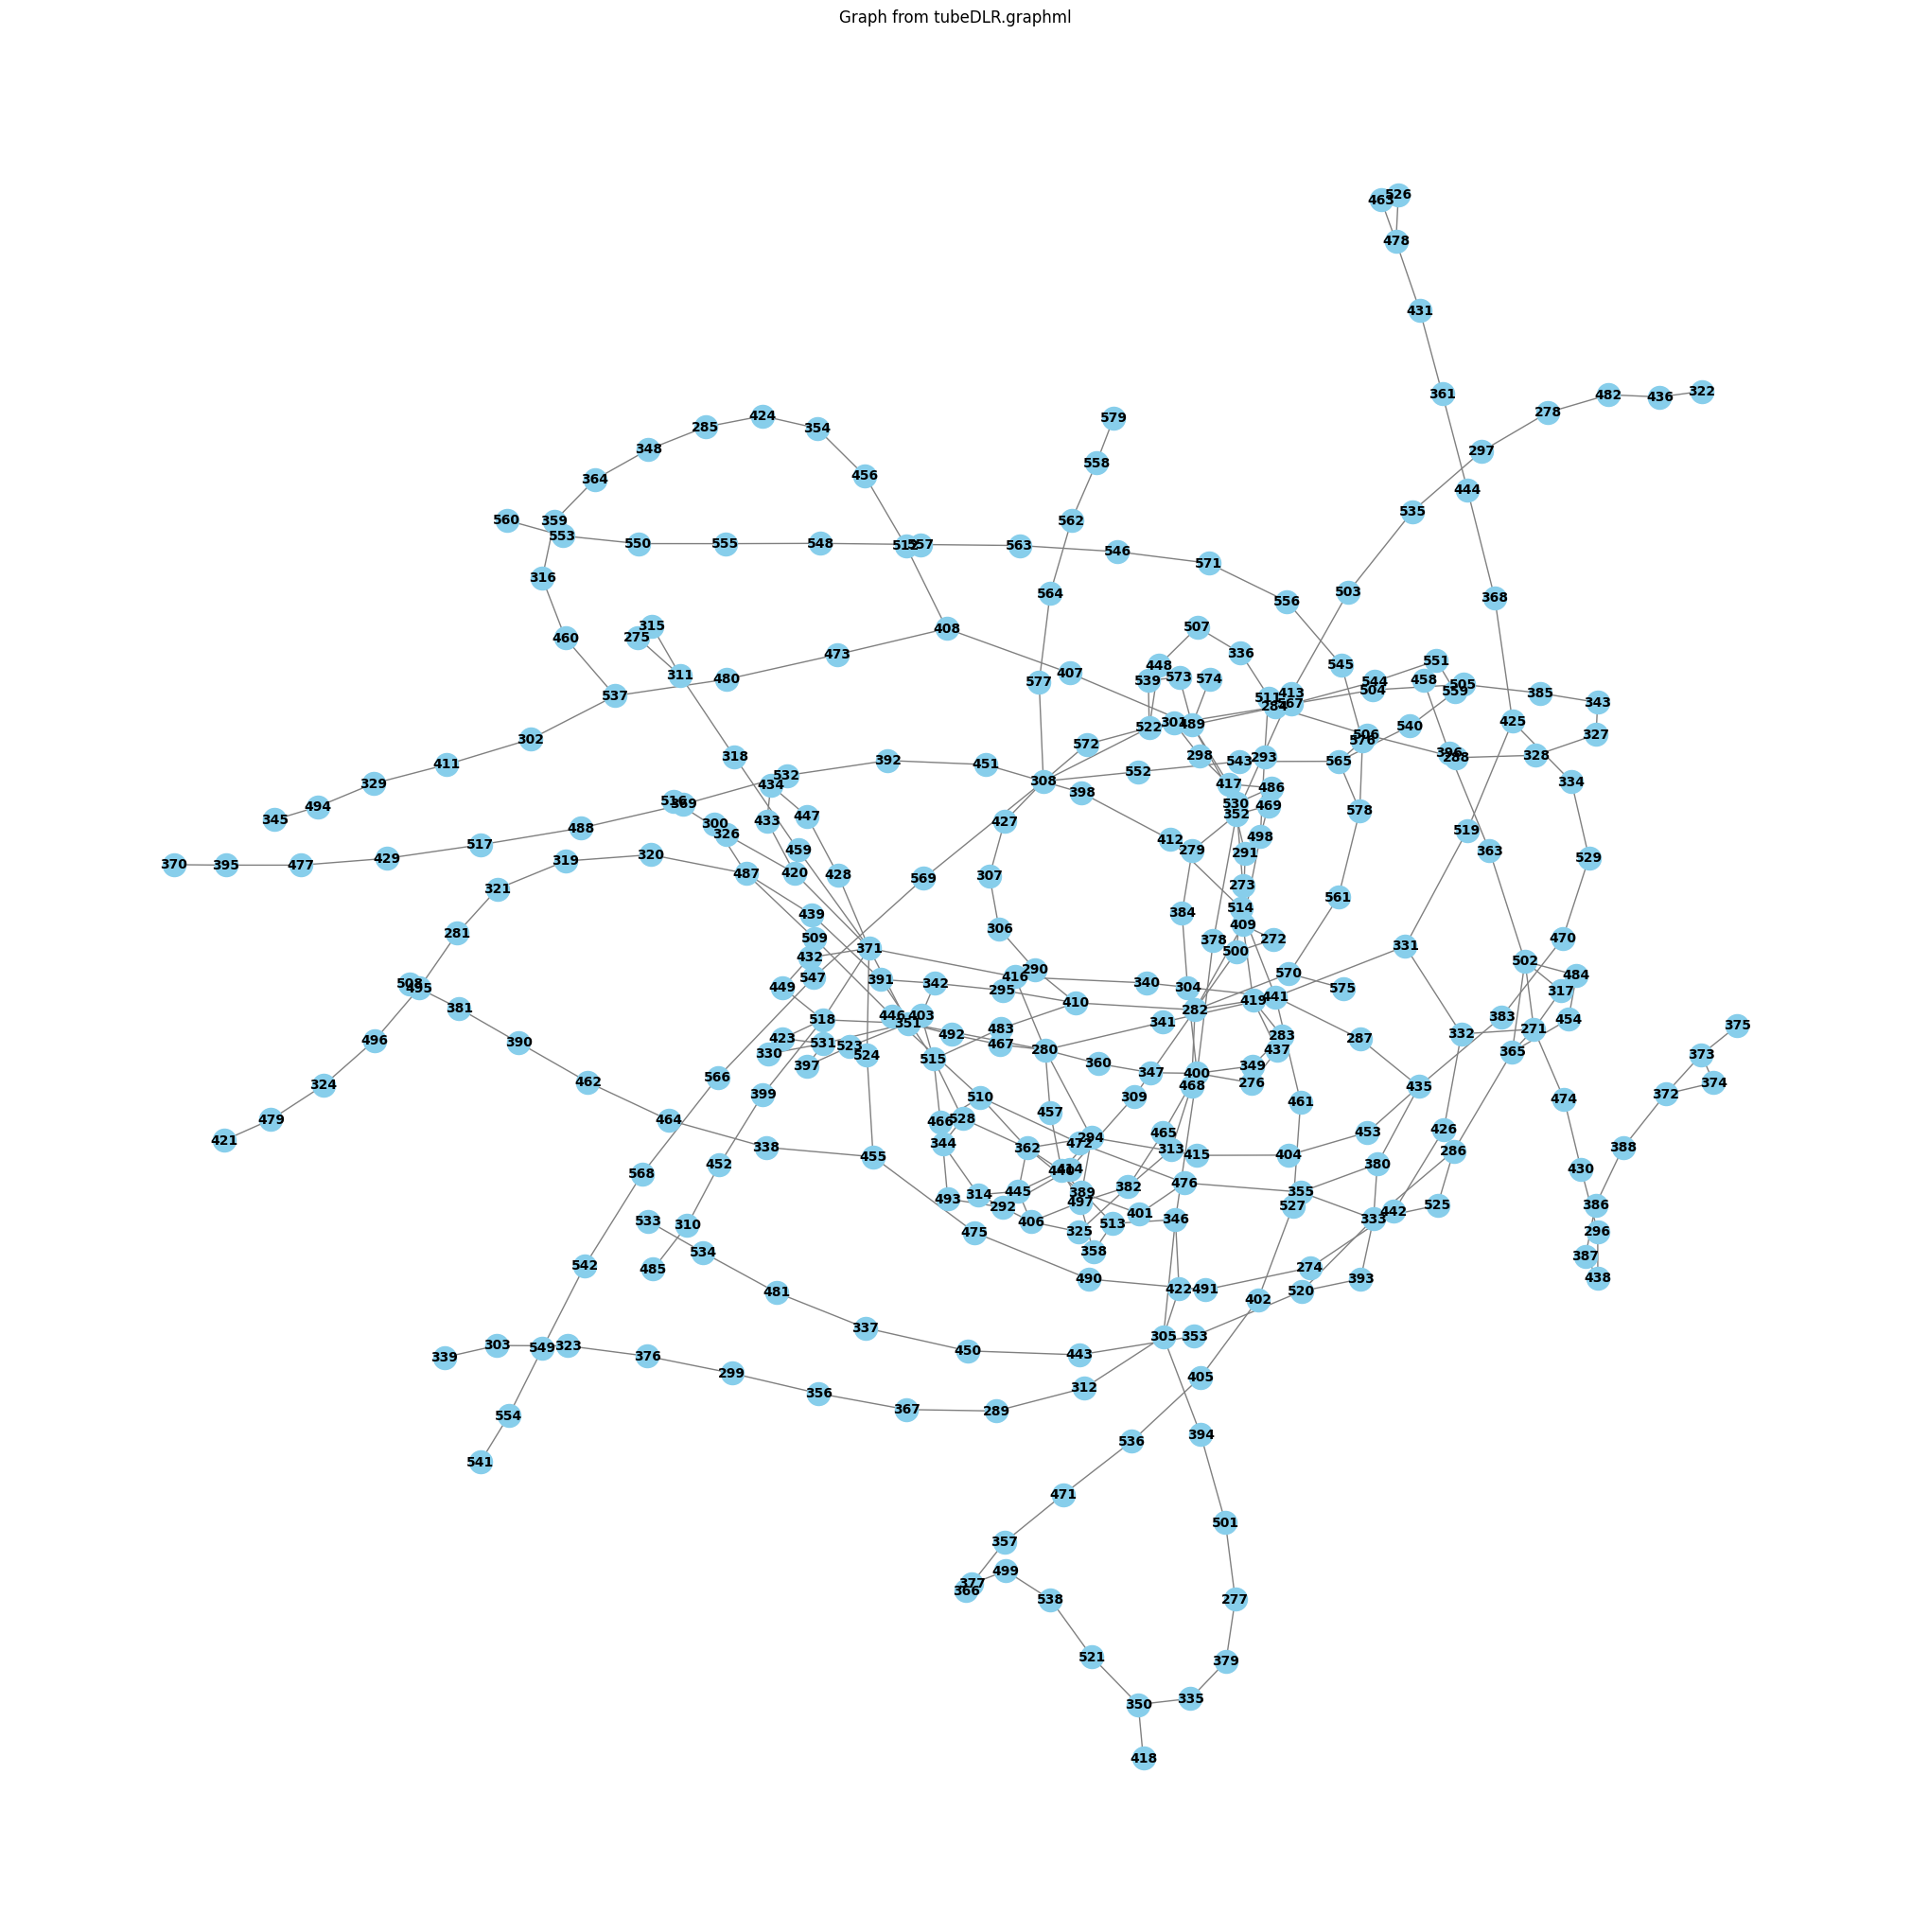

In [ ]:
#London underground network with the station number
plt.figure(figsize=(20, 20))  # Set figure size
nx.draw(G, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Graph from tubeDLR.graphml")
plt.show()


In [ ]:
# Calculate the average degree of the graph
average_degree = sum(dict(G.degree()).values()) / len(G.nodes())

print(f"Average degree of the network: {average_degree:.2f}")

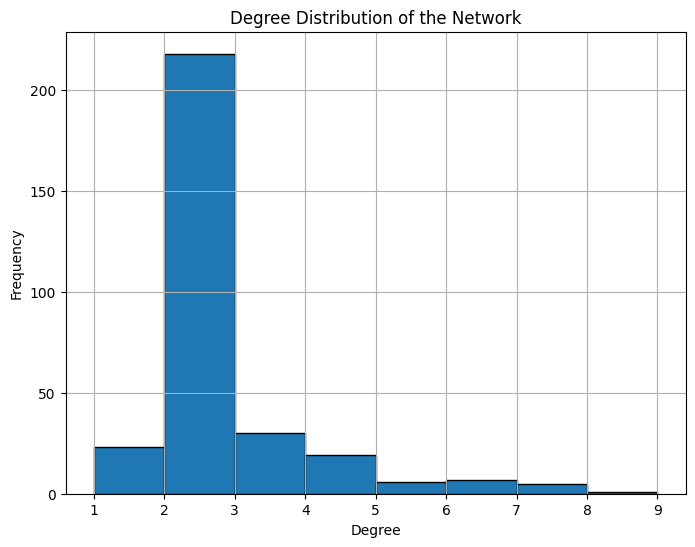


Top 5 nodes with the highest degrees:
Node: 371, Label: Harrow-on-the-Hill, Degree: 8
Node: 280, Label: Baker Street, Degree: 7
Node: 282, Label: Bank-Monument, Degree: 7
Node: 400, Label: King's Cross St. Pancras, Degree: 7
Node: 489, Label: Stratford, Degree: 7


In [45]:
# Degree of each node in the graph
degrees = dict(G.degree())  # {node: degree}

# Degree distribution (histogram)
degree_sequence = [degree for node, degree in degrees.items()]

# Plot the degree distribution
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2), edgecolor='black')
plt.title('Degree Distribution of the Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Find the top 5 nodes with the highest degrees
sorted_nodes_by_degree = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 nodes with their degrees and labels
print("\nTop 5 nodes with the highest degrees:")
for node, degree in sorted_nodes_by_degree:
    label = G.nodes[node].get('label', 'No Label')
    print(f"Node: {node}, Label: {label}, Degree: {degree}")

The top 5 nodes with the highest degrees in the network are Harrow-on-the-Hill, Baker Street, Bank-Monument, King's Cross St. Pancras, and Stratford. Harrow-on-the-Hill stands out with the highest degree of 8, indicating it has the most connections in the network. The other four stations—Baker Street, Bank-Monument, King's Cross St. Pancras, and Stratford—each have a degree of 7, showing they are all well-connected with a similar number of edges. These stations are central hubs in the network, with varying but significant levels of connectivity. 
These stations are all above the average degree of the network, which is 2.39. Their higher degrees suggest they are significantly more connected than the average station, reflecting their importance in facilitating movement and providing multiple transport links.
Some initial assumptions about their locations and roles in London transportation help provide context, a more detailed analysis would involve evaluating commuter traffic, station facilities, and transport links to further understand their importance within the network.